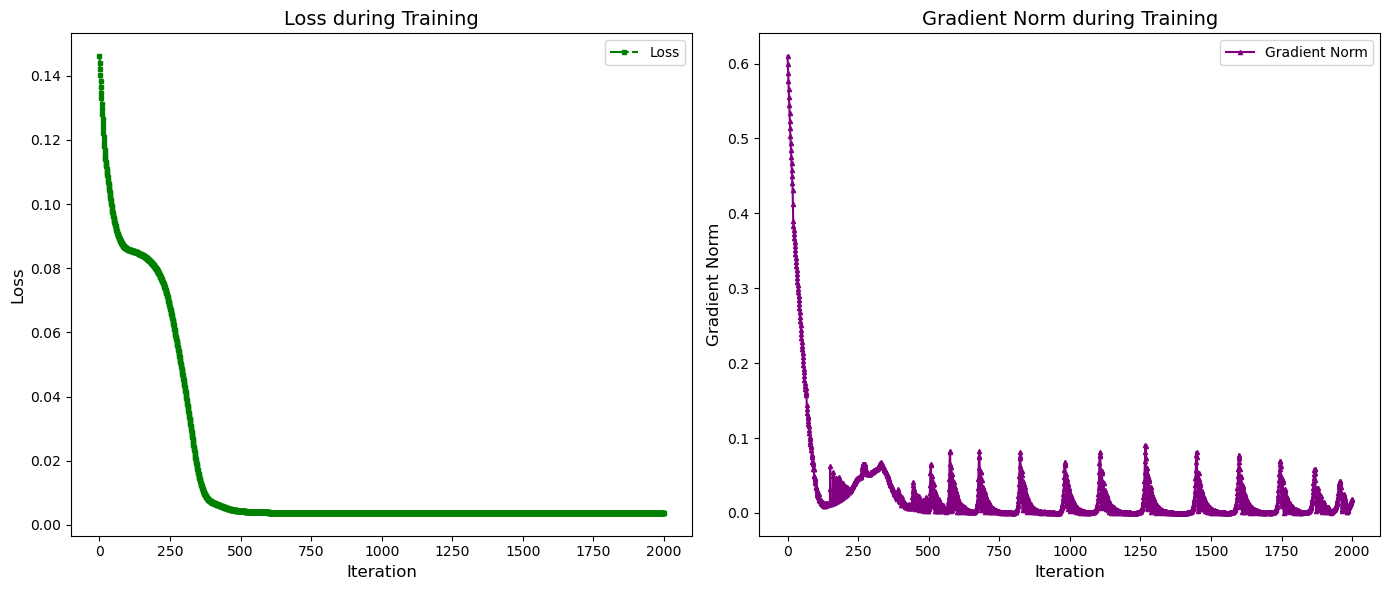

In [65]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple model architecture
class SimpleNet(nn.Module):
    def __init__(self, input_dim=1, hidden_layers=[5, 10, 10, 10, 5], output_dim=1):
        super(SimpleNet, self).__init__()
        layer_stack = []
        layer_stack.append(nn.Linear(input_dim, hidden_layers[0]))
        for i in range(len(hidden_layers) - 1):
            layer_stack.append(nn.Linear(hidden_layers[i], hidden_layers[i + 1]))
        layer_stack.append(nn.Linear(hidden_layers[-1], output_dim))
        self.layers = nn.ModuleList(layer_stack)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        return self.layers[-1](x)  

# Generate synthetic data
data_x = torch.linspace(-1, 1, 200).unsqueeze(-1)
data_y = torch.sin(5 * torch.pi * data_x) / (5 * torch.pi * data_x)

# Initialize the model, loss function, and optimizer
model = SimpleNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Function to train and track loss and gradient norm
def train_model(model, loss_fn, optimizer, data_x, data_y, num_epochs=2000):
    recorded_loss = []
    recorded_grad_norm = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        predictions = model(data_x)
        loss = loss_fn(predictions, data_y)
        loss.backward()
        optimizer.step()

        # Record the loss
        recorded_loss.append(loss.item())
        
        # Calculate and record the gradient norm (p=2 norm)
        grad_total = 0
        for param in model.parameters():
            if param.grad is not None:
                grad_total += torch.norm(param.grad, p=2).item() ** 2
        recorded_grad_norm.append(grad_total ** 0.5)

    return recorded_loss, recorded_grad_norm

# Train the model and track loss and gradient norm
loss_history, grad_norm_history = train_model(model, loss_fn, optimizer, data_x, data_y)

# Plot loss and gradient norm with different markers and colors
plt.figure(figsize=(14, 6))

# Loss Plot with different marker and color
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss', color='green', linestyle='-.', marker='s', markersize=3)
plt.title("Loss during Training", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()

# Gradient Norm Plot with different marker and color
plt.subplot(1, 2, 2)
plt.plot(grad_norm_history, label='Gradient Norm', color='purple', linestyle='-', marker='^', markersize=3)
plt.title("Gradient Norm during Training", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Gradient Norm", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()
